In [1]:

from google.colab import drive # acceso
import pandas as pd # para acceder al df
import multiprocessing # libreria para contar las cpu´s
from sklearn.model_selection import train_test_split # Modelado
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Modelado
import random # Para
import numpy as np # para manejar arrays
from sklearn.utils import shuffle
from sklearn.feature_selection import chi2 # Reporte
from sklearn.linear_model import LogisticRegression # Reporte
from sklearn.ensemble import GradientBoostingClassifier # reporte
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve # Reporte
from keras.models import Sequential # para definir modelo
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, SimpleRNN # tipos de modelos
from tensorflow.keras.utils import pad_sequences # para preparar la entrada al modelo
from tensorflow.keras.optimizers import SGD,Adam # optmizadores del modelo
import matplotlib.pyplot as plt # Libreria para hacer las graficas que necesito

In [2]:
# Accedo a drive
drive.mount('/content/drive')

lenguage_limited_balanced = pd.read_csv("/content/drive/MyDrive/lenguage_limited_balanced.csv", sep=';')
lenguage_limited_balanced.shape


Mounted at /content/drive


(7000, 12)

In [3]:
lenguage_limited_balanced

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,0,True,"03 1, 2016",A158CGQ9Q49FBO,B00002DHEV,Sully,receive item today find broken top area near m...,Broken Merchandise,1456790400,NaN,NaN,NaN
1,0,True,"04 5, 2017",A2N0QLZXJG1GUR,B00000JRSB,Amazon Customer,paid extra said booklet book,Really,1491350400,NaN,{'Format:': ' Video Game'},NaN
2,0,True,"11 20, 2009",A86IZI0UBBCPB,B00001X5C3,Vernon Johnson,wasnt even right game ordered wrestlemania sen...,This Sucks,1258675200,NaN,NaN,NaN
3,0,False,"08 29, 2001",A1HJ2ADX8TH5F6,B000006RGS,G. Hollis,going fly face convention wisdom assert tomb r...,"Concept is good, but tedious game play really ...",999043200,7.0,{'Format:': ' Video Game'},NaN
4,0,True,"08 3, 2015",A17T0HYR6AZEJ1,B00002ST37,Ryan Guerrette,gameboy pocket got yellow gameboy color instead,One Star,1438560000,NaN,{'Color:': ' Yellow'},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,False,"07 6, 2002",A2SUJNVVNKS7Y1,B00002EPY6,Brandon,easy fun game makes really try great game good...,The Best Simplest Game Out There,1025913600,NaN,NaN,NaN
6996,1,False,"12 28, 2007",A2D9GR3GE3RYG3,B00000JHPD,Smith,controllers great complaint wiring came origin...,good while it lasted,1198800000,NaN,NaN,NaN
6997,1,True,"10 15, 2016",A2R4GEAY9VSCN9,0804161380,Matthew D.,long time legend zelda fan find chest impressi...,Very gorgeous!,1476489600,NaN,{'Format:': ' Hardcover'},NaN
6998,1,True,"01 13, 2014",A2HN003L4U1BD6,0804161380,michael mccraw,thoroughly impressed items books crisp beautif...,Great box set,1389571200,NaN,{'Format:': ' Hardcover'},NaN


In [4]:
# compruebo el shape y los nan
print(lenguage_limited_balanced['reviewText'].shape)
print(lenguage_limited_balanced['overall'].isna().sum())
print(lenguage_limited_balanced['reviewText'].isna().sum())

(7000,)
0
51


In [5]:
# elimino los nan del dataset

lenguage_limited_balanced.dropna(subset=['overall','reviewText'], inplace=True)

In [6]:
# Vuelvo a examinar los shape y los nan´s

print(lenguage_limited_balanced['overall'].shape)
print(lenguage_limited_balanced['reviewText'].shape)
print(lenguage_limited_balanced['overall'].isna().sum())
print(lenguage_limited_balanced['reviewText'].isna().sum())

(6949,)
(6949,)
0
0


In [7]:
# separo los datos en train y test

X_train, X_test, y_train, y_test = train_test_split(
    lenguage_limited_balanced['reviewText'],
    lenguage_limited_balanced['overall'],
    train_size=0.80,
    test_size=0.20,
    random_state=42,
    shuffle=True,


)

In [8]:
# Creo una estancia TfidfVectorize

cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=9000,
    strip_accents='ascii',
    ngram_range=(1, 1)
)
cv.fit(X_train)

TfidfVectorizer(max_df=0.95, max_features=9000, min_df=3, strip_accents='ascii')

In [9]:
# Muestro algunas palabras y su valor despues de TfidfVectorizer

print(list(cv.vocabulary_.items())[:20])

[('bought', 605), ('game', 2275), ('say', 4698), ('worth', 6122), ('buying', 703), ('gamer', 2281), ('life', 3133), ('never', 3614), ('turned', 5717), ('video', 5906), ('within', 6079), ('minute', 3461), ('playing', 4008), ('controls', 1129), ('cares', 754), ('charecter', 835), ('can', 726), ('graphics', 2422), ('one', 3734), ('kind', 2987)]


In [10]:
# examino la longitud del vocabulario

print(len(cv.vocabulary_))

6178


In [11]:
# Transformo X_train, X_test con TfidfVectorizer y obtengo el vocabulario

X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)
vocabulary = cv.vocabulary_

In [12]:
X_train_cv

<5559x6178 sparse matrix of type '<class 'numpy.float64'>'
	with 161310 stored elements in Compressed Sparse Row format>

In [13]:
i = random.randint(0, len(X_train))
print('ID: {}'.format(i))
print('Sentiment: {}'.format(y_train.iloc[i]))
print('Review: {}'.format(X_train.iloc[i]))

ID: 1435
Sentiment: 1
Review: game well thought can command ships let game also require tell game every detail organize enjoyed many hours strategy fun will


In [14]:
doc_vector = X_train_cv[i]
df_tfidf = pd.DataFrame(doc_vector.T.todense(), index=cv.get_feature_names_out(), columns=['tfidf'])
df_tfidf = df_tfidf[df_tfidf['tfidf'] > 0]

top_n = 10
print('Top {} words with highest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[:top_n]))
print('\nTop {} words with lowest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=True)[:top_n]))

Top 10 words with highest TF_IDF in the review 1435:
             tfidf
organize  0.381876
ships     0.305051
command   0.291871
require   0.278490
detail    0.272964
strategy  0.249290
enjoyed   0.241850
tell      0.230786
game      0.228705
let       0.215760

Top 10 words with lowest TF_IDF in the review 1435:
            tfidf
can      0.126759
will     0.135070
fun      0.153571
also     0.161213
many     0.164207
well     0.174253
every    0.177831
hours    0.197540
thought  0.198100
let      0.215760


In [15]:
doc_vector = X_train_cv[i]
df_tfidf = pd.DataFrame(doc_vector.T.todense(), index=cv.get_feature_names_out(), columns=['tfidf'])
df_tfidf = df_tfidf[df_tfidf['tfidf'] > 0]

top_n = 10
print('Top {} palabras con el mayor TF-IDF en la revisión {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"], ascending=False)[:top_n]))
print('\nTop {} palabras con el menor TF-IDF en la revisión {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"], ascending=True)[:top_n]))


Top 10 palabras con el mayor TF-IDF en la revisión 1435:
             tfidf
organize  0.381876
ships     0.305051
command   0.291871
require   0.278490
detail    0.272964
strategy  0.249290
enjoyed   0.241850
tell      0.230786
game      0.228705
let       0.215760

Top 10 palabras con el menor TF-IDF en la revisión 1435:
            tfidf
can      0.126759
will     0.135070
fun      0.153571
also     0.161213
many     0.164207
well     0.174253
every    0.177831
hours    0.197540
thought  0.198100
let      0.215760


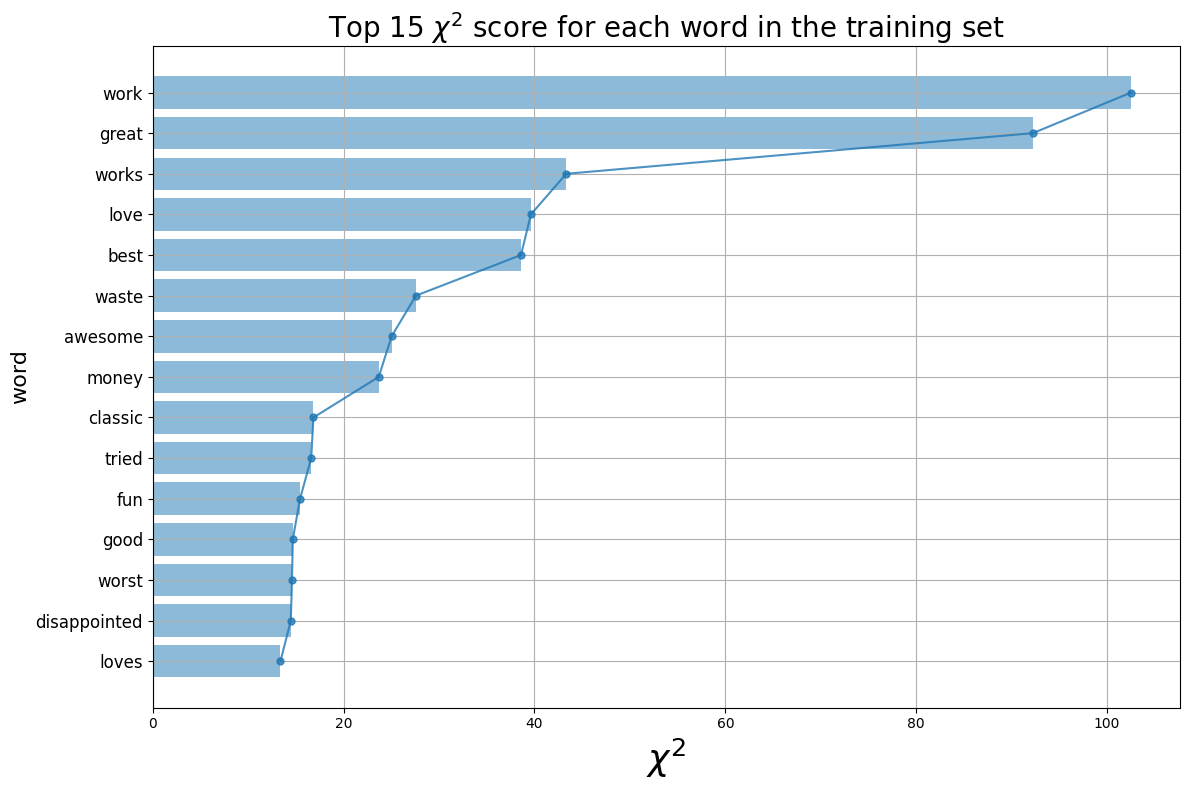

In [16]:
# Hago la selección de características con chi2

i = 15

chi2score = chi2(X_train_cv, y_train)[0]
scores = list(zip(cv.get_feature_names_out(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

In [38]:
# hago regresion logistica con distintos valores

c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=1000)
    lr.fit(X_train_cv, y_train)

    train_predict = lr.predict(X_train_cv)
    test_predict = lr.predict(X_test_cv)

    print ("Accuracy_train for C={}: {}".format(c, accuracy_score(y_train, train_predict)))
    print ("Accuracy_test for C={}: {}".format(c, accuracy_score(y_test, test_predict)))


    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))


Accuracy_train for C=0.01: 0.809498111171074
Accuracy_test for C=0.01: 0.7899280575539568
Accuracy_train for C=0.05: 0.8314445044072675
Accuracy_test for C=0.05: 0.8107913669064748
Accuracy_train for C=0.25: 0.870300413743479
Accuracy_test for C=0.25: 0.8366906474820144
Accuracy_train for C=0.5: 0.8922468069796726
Accuracy_test for C=0.5: 0.8482014388489209
Accuracy_train for C=1: 0.9167116387839539
Accuracy_test for C=1: 0.8539568345323741
Accuracy_train for C=10: 0.9812915992084907
Accuracy_test for C=10: 0.8719424460431655
Accuracy_train for C=100: 0.9965821190861666
Accuracy_test for C=100: 0.8669064748201439
Accuracy_train for C=1000: 0.9976614499010613
Accuracy_test for C=1000: 0.8568345323741007
Accuracy_train for C=10000: 0.9980212268393596
Accuracy_test for C=10000: 0.8532374100719424


In [18]:
# Hago la matriz de confusion, clasificacion y el accuracy

print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[614  94]
 [110 572]]

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       708
           1       0.86      0.84      0.85       682

    accuracy                           0.85      1390
   macro avg       0.85      0.85      0.85      1390
weighted avg       0.85      0.85      0.85      1390

Accuracy score:0.8532374100719424


In [19]:
X_train_cv

<5559x6178 sparse matrix of type '<class 'numpy.float64'>'
	with 161310 stored elements in Compressed Sparse Row format>

In [20]:
# Hago el modelo GradientBoosting

n_estimators = 32

def classify_gboost(X_train, X_test, y_train, y_test):
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=4, random_state=42)

    clf.fit(X_train, y_train)

    print("[{}] Accuracy: train = {}, test = {}".format(
            clf.__class__.__name__,
            clf.score(X_train, y_train),
            clf.score(X_test, y_test)))

    return clf


clf2 = classify_gboost(X_train_cv, X_test_cv, y_train, y_test)

[GradientBoostingClassifier] Accuracy: train = 0.8897283684115849, test = 0.7913669064748201


In [21]:
max = 0
mean = []
for example in X_train:
  length = len(example)
  mean.append(len(example))
  if length > max:
    max = length

In [22]:
sum(mean) / len(mean)

247.26893326137795

In [23]:
max

16972

In [24]:
# Vectorizo y hago pad sequence de X_train y X_test

# Crear una instancia de CountVectorizer
vectorizer = CountVectorizer()

# Ajustar el vectorizador a los datos de entrenamiento y transformarlos en una matriz de recuento
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.fit_transform(X_test).toarray()
# Mostrar la forma de la matriz de recuento
print("Forma de la matriz de recuento de palabras:", X_train_vec.shape)
max_words = 3000

X_train_vec = pad_sequences(X_train_vec, maxlen=max_words)
X_test_vec = pad_sequences(X_test_vec, maxlen=max_words)
print("Forma de la matriz de X_train_vec:", X_train_vec.shape)
print("Forma de la matriz de X_test_vec:", X_test_vec.shape)



Forma de la matriz de recuento de palabras: (5559, 14660)
Forma de la matriz de X_train_vec: (5559, 3000)
Forma de la matriz de X_test_vec: (1390, 3000)


In [25]:
import sklearn.preprocessing as pr

X_train_vec = pr.normalize(X_train_vec, axis=1)
X_test_vec = pr.normalize(X_test_vec, axis=1)

In [40]:
# hago el modelo TSM


vocabulary_size = len(vocabulary)


embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1.0), metrics=['accuracy'])
batch_size = 128
num_epochs = 1

X_train2, X_valid, y_train2, y_valid = train_test_split(X_train_vec, y_train, test_size=0.2, random_state=42)

model.fit(X_train2, y_train2,
          validation_data=(X_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 3000, 32)          197696    
                                                                 
 lstm_6 (LSTM)               (None, 100)               53200     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 250997 (980.46 KB)
Trainable params: 250997 (980.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
35/35 [==============================] - 447s 13s/step - loss: 2.3937 - accuracy: 0.5084 - val_loss: 1.2584 - val_accuracy: 0.5000


In [41]:
scores = model.evaluate(X_test_vec, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.49064749479293823


In [42]:
# Hago modelo GRU

embedding_size = 32
model_gru = Sequential()
model_gru.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_gru.add(GRU(100))
model_gru.add(Dense(1, activation='sigmoid'))

print(model_gru.summary())

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 128
num_epochs = 1



model_gru.fit(X_train2, y_train2,
          validation_data=(X_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

scores = model_gru.evaluate(X_test_vec, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 3000, 32)          197696    
                                                                 
 gru_1 (GRU)                 (None, 100)               40200     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 237997 (929.68 KB)
Trainable params: 237997 (929.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
35/35 [==============================] - 7s 153ms/step - loss: 0.6936 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Test accuracy: 0.5093525052070618


In [31]:
# Modelo RNN

embedding_size = 32
model_rnn = Sequential()
model_rnn.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(1, activation='sigmoid'))

print(model_rnn.summary())

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 64
num_epochs = 1

X_valid_rnn, y_valid_rnn = X_train_vec[:batch_size], y_train[:batch_size]  # first batch_size samples
X_train_rnn, y_train_rnn = X_train_vec[batch_size:], y_train[batch_size:]  # rest for training

model_rnn.fit(X_train_rnn, y_train_rnn,
          validation_data=(X_valid_rnn, y_valid_rnn),
          batch_size=batch_size, epochs=num_epochs)

scores = model_rnn.evaluate(X_test_vec, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3000, 32)          197696    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               13300     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 211097 (824.60 KB)
Trainable params: 211097 (824.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
86/86 [==============================] - 261s 3s/step - loss: 0.7207 - accuracy: 0.5145 - val_loss: 0.6902 - val_accuracy: 0.5469
Test accuracy: 0.5093525052070618
